In [152]:
"""
This script can be used as skelton code to read the challenge train and test
geojsons, to train a trivial model, and write data to the submission file.
"""
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np


from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt

In [72]:


change_type_map = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5}

## Read csvs

train_df = gpd.read_file('train.geojson', index_col=0)
test_df = gpd.read_file('test.geojson', index_col=0)


In [30]:
len(train_df)

296146

In [194]:
# Clean dataset
for c in train_df.columns:
    train_df = train_df.drop(train_df.index[train_df[c].isnull()])



urban_type              0
geography_type          0
change_type             0
img_red_mean_date1      0
img_green_mean_date1    0
img_blue_mean_date1     0
img_red_std_date1       0
img_green_std_date1     0
img_blue_std_date1      0
img_red_mean_date2      0
img_green_mean_date2    0
img_blue_mean_date2     0
img_red_std_date2       0
img_green_std_date2     0
img_blue_std_date2      0
img_red_mean_date3      0
img_green_mean_date3    0
img_blue_mean_date3     0
img_red_std_date3       0
img_green_std_date3     0
img_blue_std_date3      0
img_red_mean_date4      0
img_green_mean_date4    0
img_blue_mean_date4     0
img_red_std_date4       0
img_green_std_date4     0
img_blue_std_date4      0
img_red_mean_date5      0
img_green_mean_date5    0
img_blue_mean_date5     0
img_red_std_date5       0
img_green_std_date5     0
img_blue_std_date5      0
date0                   0
change_status_date0     0
date1                   0
change_status_date1     0
date2                   0
change_statu

In [96]:
len(train_df)

292758

In [200]:
# train_df[['change_status_date0', 'change_status_date1','change_status_date2','change_status_date3', 'change_status_date4']]
datetable = train_df[['date0', 'change_status_date0', 'date1', 'change_status_date1','date2', 'change_status_date2','date3', 'change_status_date3', 'date4', 'change_status_date4']]

datetable = datetable[datetable.date0.notnull()]

def sort_row(row):
    to_date_time = lambda x: datetime.strptime(x, '%d-%m-%Y')

    if not row.date0 or not row.date1 or not row.date2 or not row.date3 or not row.date4:
        return {
        'date0' : None,
        'change_status_date0' : None,
        'date1' : None,
        'change_status_date1' : None,
        'date2' : None,
        'change_status_date2' : None,
        'date3' : None,
        'change_status_date3' : None,
        'date4' : None,
        'change_status_date4' : None,
        }

    
    date0 = to_date_time(row.date0), row.change_status_date0
    date1 = to_date_time(row.date1), row.change_status_date1
    date2 = to_date_time(row.date2), row.change_status_date2
    date3 = to_date_time(row.date3), row.change_status_date3
    date4 = to_date_time(row.date4), row.change_status_date4

    s = sorted([date0, date1,date2,date3,date4])

    return {
        'date0' : s[0][0],
        'change_status_date0' : s[0][1],
        'date1' : s[1][0],
        'change_status_date1' : s[1][1],
        'date2' : s[2][0],
        'change_status_date2' : s[2][1],
        'date3' : s[3][0],
        'change_status_date3' : s[3][1],
        'date4' : s[4][0],
        'change_status_date4' : s[4][1],
    }

datetable = train_df.apply(sort_row, axis=1, result_type='expand')



In [203]:
datetable.change_status_date0.unique()

array(['Greenland', 'Prior Construction', 'Land Cleared',
       'Construction Midway', 'Construction Started', 'Materials Dumped',
       'Materials Introduced', 'Operational', 'Construction Done',
       'Excavation'], dtype=object)

In [199]:
sorted(datetable.change_status_date2.unique().tolist())

TypeError: '<' not supported between instances of 'NoneType' and 'str'

In [13]:
i = 818
datetable[10*i:10*i+10]

,date0,change_status_date0,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4
8180,2015-12-20,Land Cleared,2017-05-08,Materials Introduced,2018-02-06,Land Cleared,2019-01-30,Land Cleared,2020-04-05,Land Cleared
8181,2015-12-20,Greenland,2017-05-08,Prior Construction,2018-02-06,Construction Done,2019-01-30,Construction Done,2020-04-05,Construction Done
8182,2015-12-20,Land Cleared,2017-05-08,Materials Dumped,2018-02-06,Materials Dumped,2019-01-30,Materials Dumped,2020-04-05,Materials Dumped
8183,2015-12-20,Construction Midway,2017-05-08,Construction Midway,2018-02-06,Construction Midway,2019-01-30,Construction Midway,2020-04-05,Construction Done
8184,2015-12-20,Land Cleared,2017-05-08,Materials Dumped,2018-02-06,Land Cleared,2019-01-30,Materials Dumped,2020-04-05,Materials Dumped
8185,2015-12-20,Prior Construction,2017-05-08,Prior Construction,2018-02-06,Prior Construction,2019-01-30,Prior Construction,2020-04-05,Prior Construction
8186,2015-12-20,Prior Construction,2017-05-08,Land Cleared,2018-02-06,Land Cleared,2019-01-30,Land Cleared,2020-04-05,Land Cleared
8187,2015-12-20,Prior Construction,2017-05-08,Prior Construction,2018-02-06,Prior Construction,2019-01-30,Land Cleared,2020-04-05,Materials Dumped
8188,2015-12-20,Construction Midway,2017-05-08,Construction Done,2018-02-06,Land Cleared,2019-01-30,Construction Started,2020-04-05,Construction Done
8189,2015-12-20,Materials Introduced,2017-05-08,Materials Introduced,2018-02-06,Materials Dumped,2019-01-30,Construction Started,2020-04-05,Construction Done


date0                  0
change_status_date0    0
date1                  0
change_status_date1    0
date2                  0
change_status_date2    0
date3                  0
change_status_date3    0
date4                  0
change_status_date4    0
dtype: int64

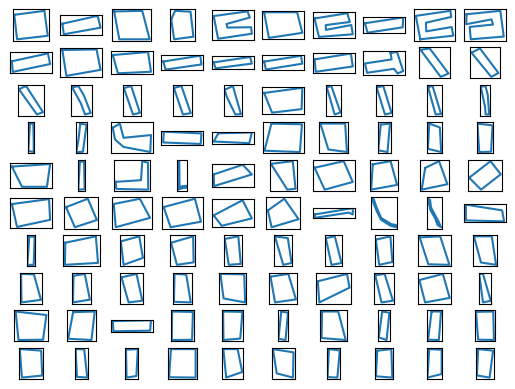

In [52]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect(1)
    plt.plot(*train_df.iloc[i+300].geometry.exterior.xy)

In [15]:
geography_types = train_df.geography_type.unique().tolist()
geography_types.remove('N,A')
geography_types_parts = {x for type in geography_types for x in type.split(',')}
geography_types_parts

{'Barren Land',
 'Coastal',
 'Dense Forest',
 'Desert',
 'Farms',
 'Grass Land',
 'Hills',
 'Lakes',
 'River',
 'Snow',
 'Sparse Forest'}

In [62]:
s = set(train_df.columns.values.__iter__())
s2 = set(test_df.columns.values.__iter__())

[c for c in s if c not in s2]

['change_type']

In [18]:
print(test_df['geometry'][0])

POLYGON ((2.90271970706607 35.431301799733156, 2.902738547835891 35.43093260838469, 2.903036860024736 35.43094906914545, 2.90297091733036 35.43131590895667, 2.90271970706607 35.431301799733156))


In [13]:
urban_types_representations = {
    'N,A': np.zeros(5),
    'Dense Urban' : np.array([1,0,0,0,0]),
    'Industrial' : np.array([0,1,0,0,0]),
    'Rural' : np.array([0,0,1,0,0]),
    'Sparse Urban' : np.array([0,0,0,1,0]),
    'Urban Slum' : np.array([0,0,0,0,1]),
}

def map_urban_type(urban_type):
    if urban_type == 'N,A':
        return urban_types_representations['N,A']
    
    representation = np.zeros(5)
    for part in urban_type.split(','):
        representation += urban_types_representations[part]
    return representation

In [121]:
geography_types_representations = {
    'N,A':              np.zeros(11),
    'Barren Land' :     np.eye(11)[0],
    'Coastal' :         np.eye(11)[1],
    'Dense Forest' :    np.eye(11)[2],
    'Desert' :          np.eye(11)[3],
    'Farms' :           np.eye(11)[4],
    'Grass Land' :      np.eye(11)[5],
    'Hills' :           np.eye(11)[6],
    'Lakes' :           np.eye(11)[7],
    'River' :           np.eye(11)[8],
    'Snow' :            np.eye(11)[9],
    'Sparse Forest' :   np.eye(11)[10],
}

def map_geography_type(geography_type):
    if geography_type == 'N,A':
        return {f'geography_type_{i}':x for i, x in enumerate(geography_types_representations['N,A'])}
    
    representation = np.zeros(11)
    for part in geography_type.split(','):
        representation += geography_types_representations[part]
    return {f'geography_type_{i}':x for i,x in enumerate(representation)}

In [122]:
train_df.apply(lambda x: map_geography_type(x.geography_type),axis=1, result_type="expand")

,geography_type_0,geography_type_1,geography_type_2,geography_type_3,geography_type_4,geography_type_5,geography_type_6,geography_type_7,geography_type_8,geography_type_9,geography_type_10
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
296141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296144,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
train_df.columns

Index(['urban_type', 'geography_type', 'change_type', 'img_red_mean_date1',
       'img_green_mean_date1', 'img_blue_mean_date1', 'img_red_std_date1',
       'img_green_std_date1', 'img_blue_std_date1', 'img_red_mean_date2',
       'img_green_mean_date2', 'img_blue_mean_date2', 'img_red_std_date2',
       'img_green_std_date2', 'img_blue_std_date2', 'img_red_mean_date3',
       'img_green_mean_date3', 'img_blue_mean_date3', 'img_red_std_date3',
       'img_green_std_date3', 'img_blue_std_date3', 'img_red_mean_date4',
       'img_green_mean_date4', 'img_blue_mean_date4', 'img_red_std_date4',
       'img_green_std_date4', 'img_blue_std_date4', 'img_red_mean_date5',
       'img_green_mean_date5', 'img_blue_mean_date5', 'img_red_std_date5',
       'img_green_std_date5', 'img_blue_std_date5', 'date0',
       'change_status_date0', 'date1', 'change_status_date1', 'date2',
       'change_status_date2', 'date3', 'change_status_date3', 'date4',
       'change_status_date4', 'index', 'geometry']

In [204]:
5 + 11 + 30 + 4 + 50 + 1

101

POLYGON ((112.16891598575654 32.008728701088565, 112.16898740195316 32.00850198164835, 112.16961716295967 32.008722887769586, 112.16959768581515 32.00894960720981, 112.16891598575654 32.008728701088565))
POLYGON ((112.16964313248572 32.0089205406149, 112.16984439631254 32.008286888846094, 112.16994827441671 32.00831014212201, 112.16974701058989 32.008961233847764, 112.16964313248572 32.0089205406149))
POLYGON ((112.16894195528258 32.00827526220814, 112.16892897051956 32.00815318250955, 112.16970805630082 32.008397341906715, 112.16968208677478 32.00849616832937, 112.16894195528258 32.00827526220814))
POLYGON ((112.16892897051956 32.00806598272486, 112.16897441719013 32.00800203621608, 112.1698184267865 32.008286888846094, 112.1697599953529 32.00839152858773, 112.16892897051956 32.00806598272486))
POLYGON ((112.1711753345222 32.00885659410613, 112.17125324310032 32.00862987466591, 112.17157136979434 32.00874032772653, 112.17152592312377 32.008839154149186, 112.17165577075397 32.008903100

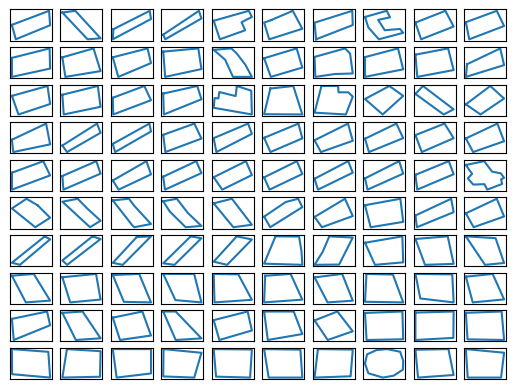

In [160]:
for i, poly in enumerate(train_df.query('urban_type == \'N,A\'').geometry[:1]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    print(poly)
    plt.plot(*poly.exterior.xy)

In [208]:
notna.geometry.area

C:\Users\triba\AppData\Local\Temp\ipykernel_6148\916825388.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  notna.geometry.area


15    4.190903e-07
16    1.153593e-06
19    1.077542e-07
20    2.553077e-07
24    7.497505e-08
28    2.876151e-07
29    3.285843e-07
31    7.918331e-08
32    5.297130e-08
34    8.371239e-08
35    1.049236e-07
36    1.026590e-07
38    1.806723e-07
39    9.767703e-08
40    2.339267e-07
41    3.062975e-07
42    9.799784e-08
43    8.435401e-08
44    9.058148e-08
45    5.803065e-07
46    9.329893e-08
47    4.489445e-08
48    5.164466e-07
49    2.347193e-07
50    2.548359e-07
dtype: float64

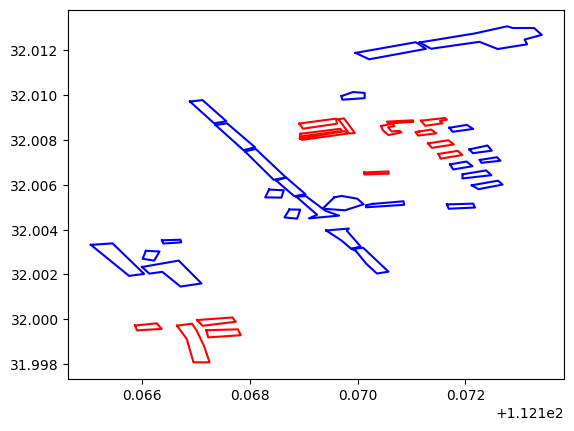

In [ ]:
na = train_df.query('urban_type == \'N,A\'').iloc[:15]
notna = train_df.query('urban_type != \'N,A\'').iloc[15:40]

for x in na.geometry:
    plt.plot(*x.exterior.xy, color='r')
for x in notna.geometry:
    plt.plot(*x.exterior.xy, color='b')

In [188]:
print(*(x for x in notna.urban_type), sep='\n')

Rural
Sparse Urban
Rural
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Sparse Urban
Dense Urban
Sparse Urban
Sparse Urban
Sparse Urban
